In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
np.random.seed(42)

In [2]:
data = pd.read_csv(r'.\data\FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
Features = data[['ENGINESIZE','FUELCONSUMPTION_COMB']]
target = data[['CO2EMISSIONS']]

In [4]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    Features, target
)

In [5]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(xtrain, ytrain.values.ravel())

RandomForestRegressor()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
ypred = model.predict(xtest)
print("MSE: ", mean_squared_error(ytest, ypred))
print("R2 Score: ", r2_score(ytest, ypred))

MSE:  193.1284085263923
R2 Score:  0.9534403013872323


In [7]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(model, Features, target.values.ravel())

In [8]:
cv.mean()

0.9349821132531231

In [9]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    model,
    param_grid={
        'n_estimators': [100,200,300,400],
        'max_depth': [5,10,20, 25, 30, 40, 50],
        'criterion': ['mse', 'mae'],
        'min_samples_split': [5,10,15,20],
        'bootstrap': [True, False]
    }, cv=5,n_jobs=-1
)
grid.fit(Features, target.values.ravel())

In [ ]:
dummyFeature1 = np.linspace(0, 10, 400)
dummyFeature2 = np.linspace(4, 31, 400)
dummyFeature = np.c_[dummyFeature1, dummyFeature2]

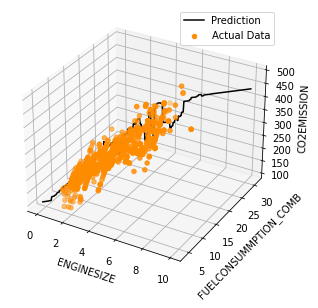

In [ ]:
model.fit(Features, target.values.ravel())
fig = plt.figure(1, figsize=(20, 5))
axes = plt.axes(projection='3d')
axes.scatter3D(Features[['ENGINESIZE']], data[[
               'FUELCONSUMPTION_COMB']], target, label='Actual Data', color='darkorange')
axes.plot3D(dummyFeature1, dummyFeature2, model.predict(
    dummyFeature).ravel(), label='Prediction', color='black')
axes.legend()
axes.set_xlabel("ENGINESIZE")
axes.set_ylabel("FUELCONSUMMPTION_COMB")
axes.set_zlabel("CO2EMISSION")
plt.show()
